In [31]:
import requests_cache
import pandas_datareader.data as web

from datetime import datetime

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

%env IEX_API_KEY=pk_36bd9794e5ab4cc1ab053a0e72466c3a

start = datetime(2019, 1, 1)
end = datetime.today()

qqq = web.DataReader('QQQ', 'iex', start, end, session=session)
qqq

env: IEX_API_KEY=pk_36bd9794e5ab4cc1ab053a0e72466c3a


,open,high,low,close,volume
date,,,,,
2019-01-02,150.99,155.75,150.88,154.88,58576672
2019-01-03,152.60,153.26,149.49,149.82,74820225
2019-01-04,152.18,157.00,151.74,156.23,74709320
2019-01-07,156.54,158.86,156.11,158.09,52059331
2019-01-08,159.56,160.11,157.20,159.52,49388694
...,...,...,...,...,...
2020-05-22,228.46,229.87,227.50,229.66,28762389
2020-05-26,233.44,233.57,228.79,229.04,33055346
2020-05-27,228.51,230.41,223.94,230.29,55665565


In [32]:
import pandas as pd

qqq_data_signal = pd.DataFrame(index=qqq.index)
qqq_data_signal['price'] = qqq['close']
qqq_data_signal['daily_difference'] = qqq['close'].diff()

qqq_data_signal

,price,daily_difference
date,,
2019-01-02,154.88,NaN
2019-01-03,149.82,-5.06
2019-01-04,156.23,6.41
2019-01-07,158.09,1.86
2019-01-08,159.52,1.43
...,...,...
2020-05-22,229.66,0.79
2020-05-26,229.04,-0.62
2020-05-27,230.29,1.25


In [33]:
import numpy as np

qqq_data_signal['signal'] = 0.0
qqq_data_signal['signal'] = np.where(qqq_data_signal['daily_difference'] > 0, 1.0, 0.0)
qqq_data_signal

,price,daily_difference,signal
date,,,
2019-01-02,154.88,NaN,0.0
2019-01-03,149.82,-5.06,0.0
2019-01-04,156.23,6.41,1.0
2019-01-07,158.09,1.86,1.0
2019-01-08,159.52,1.43,1.0
...,...,...,...
2020-05-22,229.66,0.79,1.0
2020-05-26,229.04,-0.62,0.0
2020-05-27,230.29,1.25,1.0


In [34]:
qqq_data_signal['positions'] = qqq_data_signal['signal'].diff()
qqq_data_signal

,price,daily_difference,signal,positions
date,,,,
2019-01-02,154.88,NaN,0.0,NaN
2019-01-03,149.82,-5.06,0.0,0.0
2019-01-04,156.23,6.41,1.0,1.0
2019-01-07,158.09,1.86,1.0,0.0
2019-01-08,159.52,1.43,1.0,0.0
...,...,...,...,...
2020-05-22,229.66,0.79,1.0,1.0
2020-05-26,229.04,-0.62,0.0,-1.0
2020-05-27,230.29,1.25,1.0,1.0


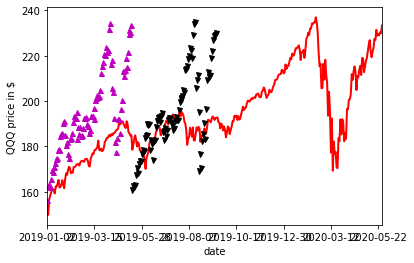

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(ylabel='QQQ price in $')

qqq_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(qqq_data_signal.loc[qqq_data_signal.positions == 1.0].index, 
         qqq_data_signal.price[qqq_data_signal.positions == 1.0], 
         '^', markerSize=5, color='m')

ax1.plot(qqq_data_signal.loc[qqq_data_signal.positions == -1.0].index,
         qqq_data_signal.price[qqq_data_signal.positions == -1.0],
        'v', markerSize=5, color='k')

plt.show()